In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
data = pd.read_csv(r'C:\Users\Dell\Desktop\ai assignment\data\Student_dataset.csv')

In [9]:
print("first 5 rows of the dataset:")
data.head()

first 5 rows of the dataset:


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [10]:
print ("dataset information:")
data.info()

dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation 

In [11]:
print("Statistical summary of the dataset:")
data.describe()

Statistical summary of the dataset:


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [12]:
print("Checking for missing values:")
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0]if missing_values.sum()>0 else "No missing values found.")

Checking for missing values:
No missing values found.


In [13]:
duplicates = data.duplicated().sum()
print(f"Duplicate rows found: {duplicates}")
if duplicates > 0:
    data = data.drop_duplicates()
    print(f"Duplicates are removed. New shape: {data.shape}")

Duplicate rows found: 0


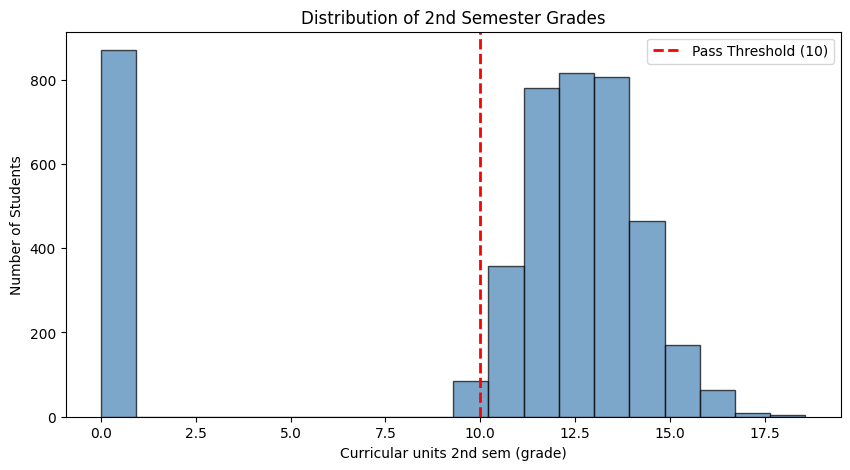

In [28]:
# Visualize the distribution of final grades with pass threshold line
plt.figure(figsize=(10, 5))
plt.hist(data['Curricular units 2nd sem (grade)'], bins=20, color='steelblue', edgecolor='black', alpha=0.7)
plt.axvline(x=10, color='red', linestyle='--', linewidth=2, label='Pass Threshold (10)')
plt.xlabel('Curricular units 2nd sem (grade)')
plt.ylabel('Number of Students')
plt.title('Distribution of 2nd Semester Grades')
plt.legend()
plt.show()

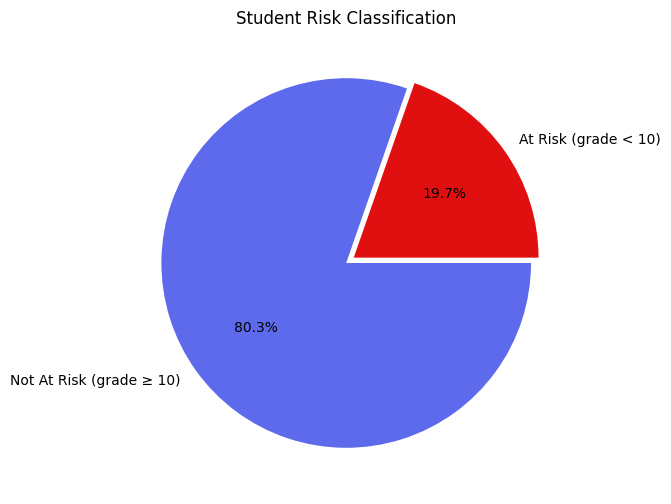

At Risk: 870 | Not At Risk: 3554


In [29]:
# Create pie chart showing risk classification (At Risk vs Not At Risk)
grade_col = 'Curricular units 2nd sem (grade)'
risk_counts = [(data[grade_col] < 10).sum(), (data[grade_col] >= 10).sum()]
labels = ['At Risk (grade < 10)', 'Not At Risk (grade ≥ 10)']
colors = ["#E11010", "#5E6AEC"]

plt.figure(figsize=(10, 6))
plt.pie(risk_counts, labels=labels, autopct='%1.1f%%', colors=colors, explode=(0.05, 0))
plt.title('Student Risk Classification')
plt.show()

print(f"At Risk: {risk_counts[0]} | Not At Risk: {risk_counts[1]}")

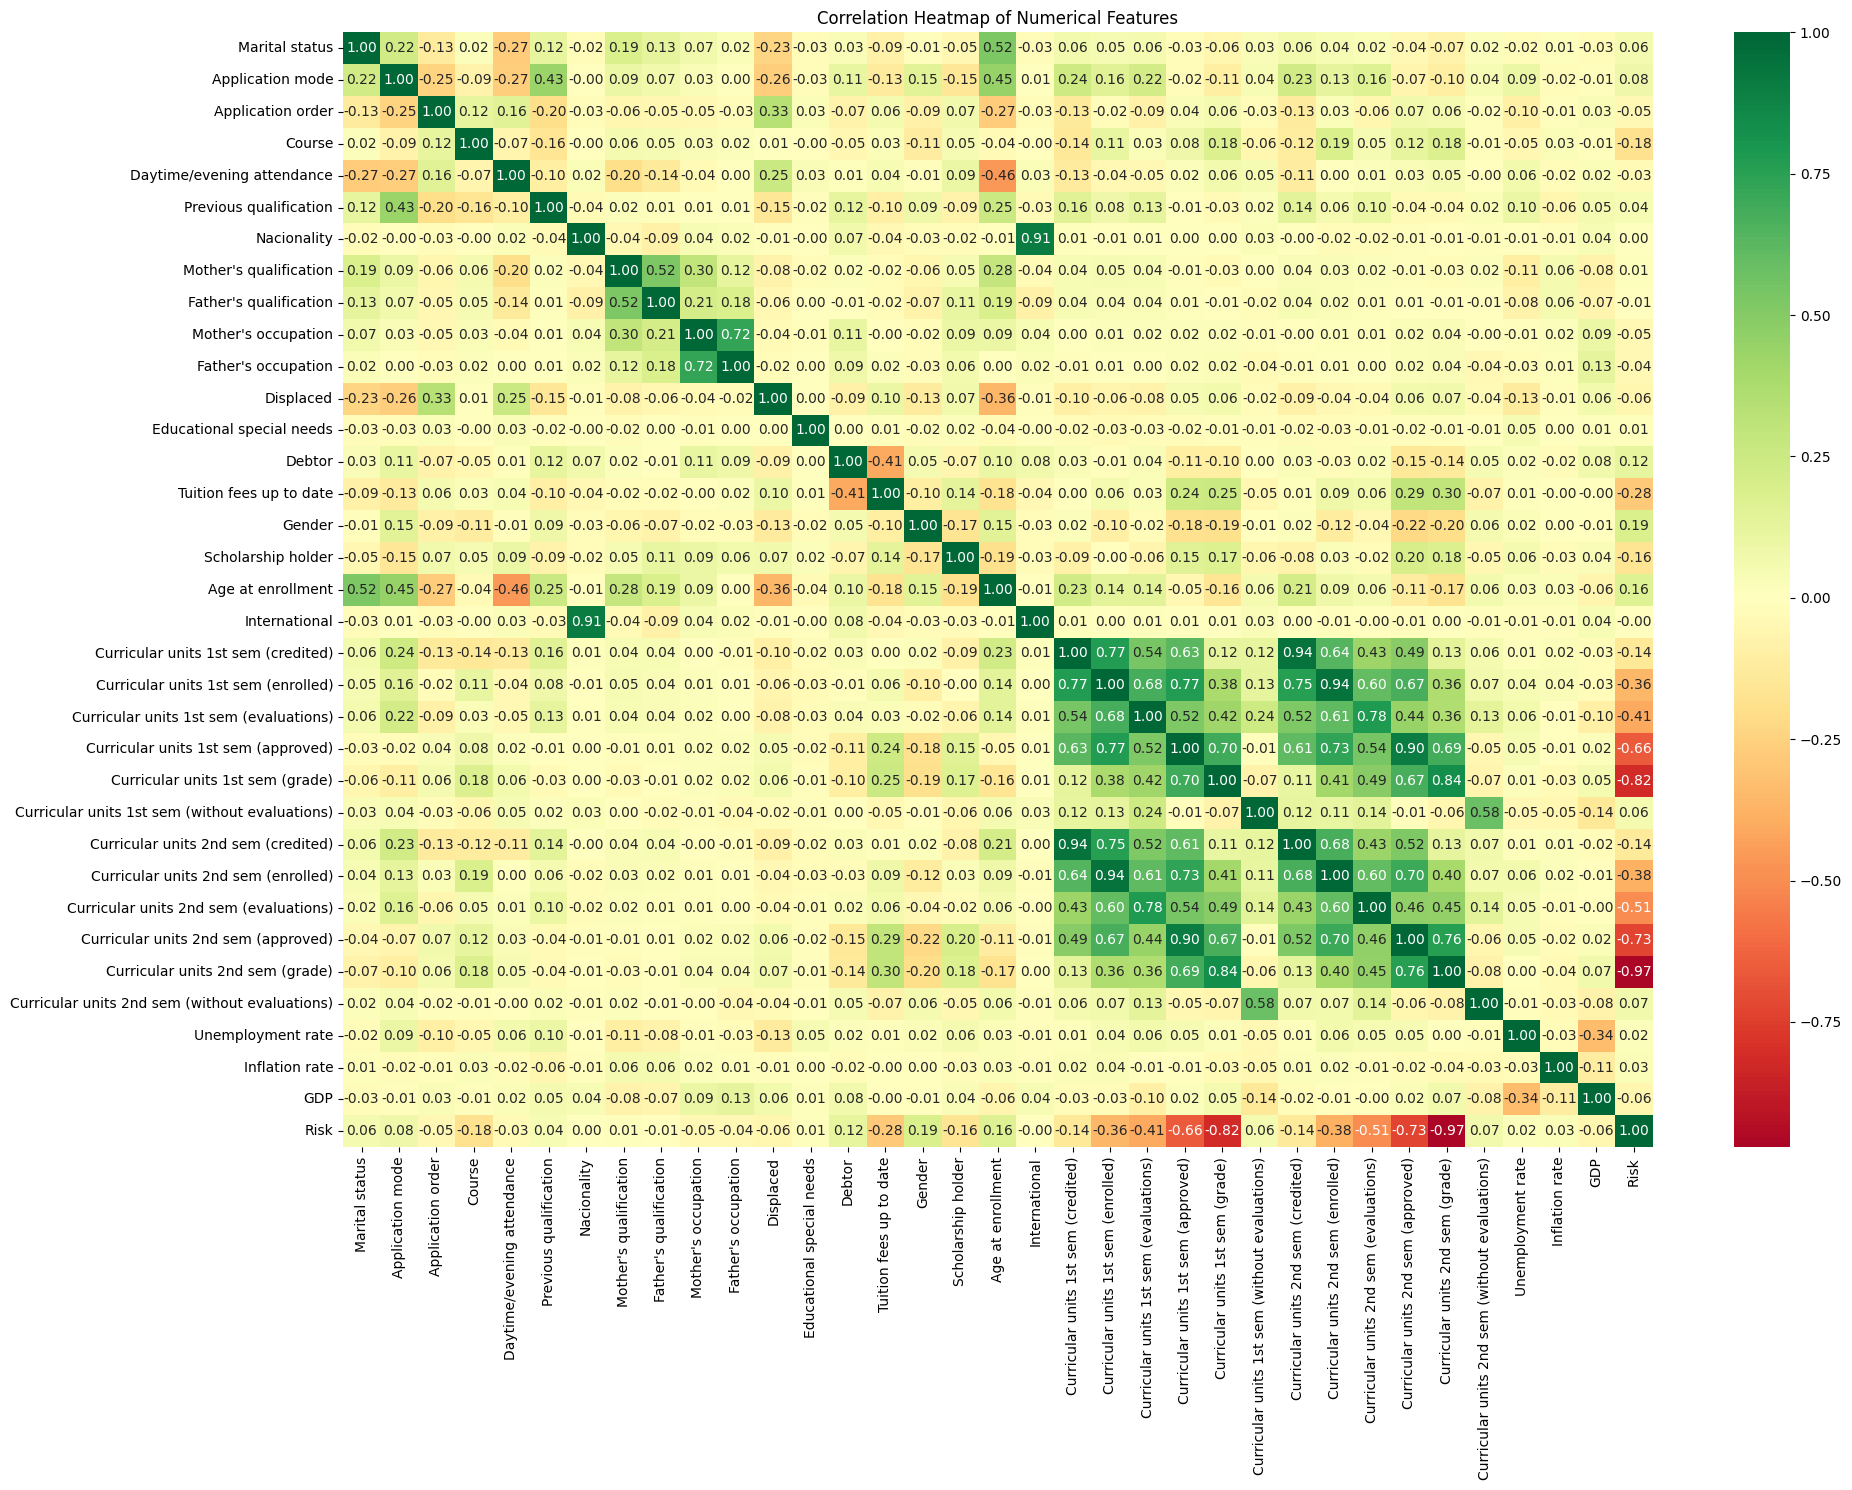

In [33]:

# Create correlation heatmap to identify relationships between features
numerical_cols = data.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(20, 15))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='RdYlGn', center=0, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

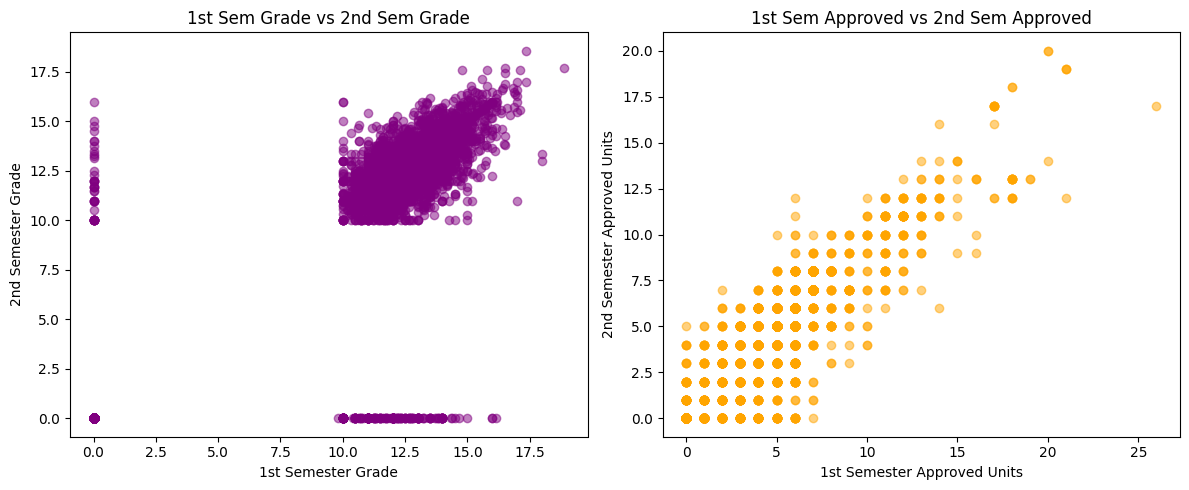

In [34]:
# Scatter plots showing grade progression from 1st sem to 2nd sem
g1 = 'Curricular units 1st sem (grade)'
g2 = 'Curricular units 2nd sem (grade)'
a1 = 'Curricular units 1st sem (approved)'
a2 = 'Curricular units 2nd sem (approved)'

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Grade comparison
ax[0].scatter(data[g1], data[g2], alpha=0.5, color='purple')
ax[0].set_xlabel('1st Semester Grade')
ax[0].set_ylabel('2nd Semester Grade')
ax[0].set_title('1st Sem Grade vs 2nd Sem Grade')

# Plot 2: Approved units comparison
ax[1].scatter(data[a1], data[a2], alpha=0.5, color='orange')
ax[1].set_xlabel('1st Semester Approved Units')
ax[1].set_ylabel('2nd Semester Approved Units')
ax[1].set_title('1st Sem Approved vs 2nd Sem Approved')

plt.tight_layout()
plt.show()

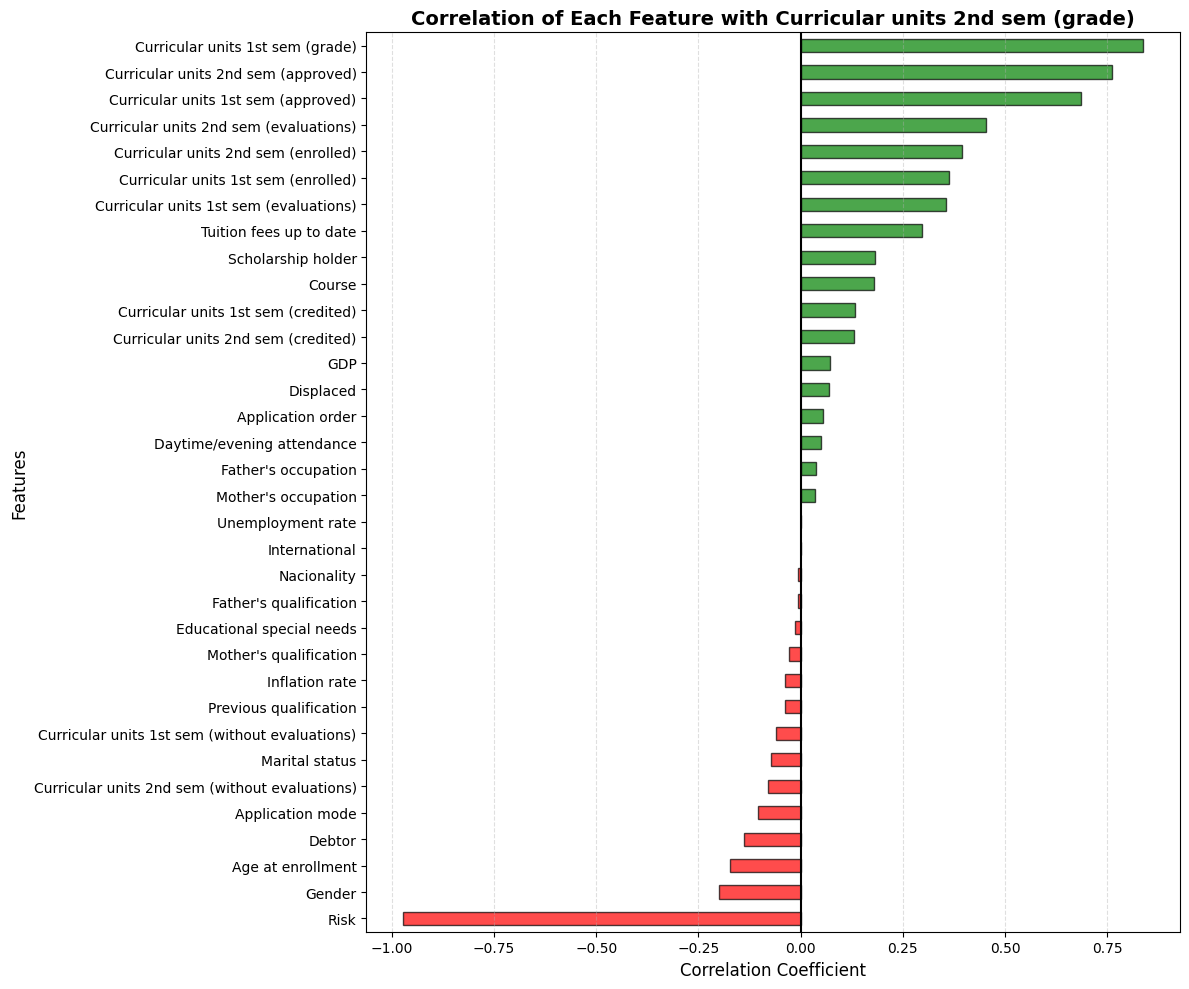

In [35]:
# Bar chart showing correlation of each feature with final grade
target_col = 'Curricular units 2nd sem (grade)'
numerical_cols = data.select_dtypes(include=[np.number]).columns
correlations = data[numerical_cols].corr()[target_col].drop(labels=[target_col], errors='ignore')
correlations_sorted = correlations.sort_values()

plt.figure(figsize=(12, 10))
colors = ['green' if x > 0 else 'red' for x in correlations_sorted]
correlations_sorted.plot(kind='barh', color=colors, alpha=0.7, edgecolor='black')
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title(f'Correlation of Each Feature with {target_col}', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linewidth=1.5)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [38]:
# Display all categorical columns and their unique values
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

print(f"Total Categorical Columns: {len(categorical_cols)}\n")

for col in categorical_cols:
    unique_values = data[col].unique()
    num_unique = len(unique_values)
    
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {num_unique}")
    print(f"Unique values: {list(unique_values)}")
 

Total Categorical Columns: 1


Column: Target
Number of unique values: 3
Unique values: ['Dropout', 'Graduate', 'Enrolled']


In [40]:
# Define the 12 most important features for the prediction model
target_col = 'Curricular units 2nd sem (grade)'

# Get numerical columns and calculate correlations
numerical_cols = data.select_dtypes(include=[np.number]).columns
correlations = data[numerical_cols].corr()[target_col].drop(labels=[target_col], errors='ignore')

# Select top 12 features based on absolute correlation values
top_12 = correlations.abs().sort_values(ascending=False).head(12)

print("Top 12 Most Important Features for Predicting Final Grade:")

for i, feature in enumerate(top_12.index, 1):
    actual_corr = correlations[feature]
    print(f"{i:2d}. {feature:50s} | Correlation: {actual_corr:7.4f}")

print("\n" )
print("These features will be used for the prediction model.")

# Store the feature names for later use
important_features = top_12.index.tolist()
print(f"\nStored in variable: important_features")
print(important_features)

Top 12 Most Important Features for Predicting Final Grade:
 1. Risk                                               | Correlation: -0.9715
 2. Curricular units 1st sem (grade)                   | Correlation:  0.8372
 3. Curricular units 2nd sem (approved)                | Correlation:  0.7608
 4. Curricular units 1st sem (approved)                | Correlation:  0.6856
 5. Curricular units 2nd sem (evaluations)             | Correlation:  0.4534
 6. Curricular units 2nd sem (enrolled)                | Correlation:  0.3951
 7. Curricular units 1st sem (enrolled)                | Correlation:  0.3620
 8. Curricular units 1st sem (evaluations)             | Correlation:  0.3550
 9. Tuition fees up to date                            | Correlation:  0.2965
10. Gender                                             | Correlation: -0.1991
11. Scholarship holder                                 | Correlation:  0.1812
12. Course                                             | Correlation:  0.1790


The

In [41]:
# Create binary Risk label (1 = At Risk if grade < 10, 0 = Not At Risk)
data['Risk'] = (data['Curricular units 2nd sem (grade)'] < 10).astype(int)

# Verify the distribution
print("Risk Label Distribution:")
print(data['Risk'].value_counts().sort_index())
print(f"\n0 = Not At Risk (grade >= 10): {(data['Risk'] == 0).sum()} students")
print(f"1 = At Risk (grade < 10): {(data['Risk'] == 1).sum()} students")

# Show first few rows
print("\nSample of data with Risk label:")
print(data[['Curricular units 2nd sem (grade)', 'Risk']].head(10))

Risk Label Distribution:
Risk
0    3554
1     870
Name: count, dtype: int64

0 = Not At Risk (grade >= 10): 3554 students
1 = At Risk (grade < 10): 870 students

Sample of data with Risk label:
   Curricular units 2nd sem (grade)  Risk
0                          0.000000     1
1                         13.666667     0
2                          0.000000     1
3                         12.400000     0
4                         13.000000     0
5                         11.500000     0
6                         14.345000     0
7                          0.000000     1
8                         14.142857     0
9                         13.500000     0


In [62]:
print(f"Number of rows: {data_clean.shape[0]}")
print(f"Number of features: {data_clean.shape[1] - 1}")
print(f"Selected Features ({len(important_features)}):")
for i, feat in enumerate(important_features, 1):
    print(f"  {i:2d}. {feat}")
print("\nFirst few rows of cleaned dataset:")
print(data_clean.head())

print("\nDataset info:")
print(data_clean.info())

# Save the cleaned dataset
output_path = r'C:\Users\Dell\Desktop\ai assignment\data\cleaned_student_data.csv'
data_clean.to_csv(output_path, index=False)
print(f"\nCleaned dataset saved to: {output_path}")

Number of rows: 4424
Number of features: 12
Selected Features (12):
   1. Risk
   2. Curricular units 1st sem (grade)
   3. Curricular units 2nd sem (approved)
   4. Curricular units 1st sem (approved)
   5. Curricular units 2nd sem (evaluations)
   6. Curricular units 2nd sem (enrolled)
   7. Curricular units 1st sem (enrolled)
   8. Curricular units 1st sem (evaluations)
   9. Tuition fees up to date
  10. Gender
  11. Scholarship holder
  12. Course

First few rows of cleaned dataset:
   Risk  Curricular units 1st sem (grade)  \
0     1                          0.000000   
1     0                         14.000000   
2     1                          0.000000   
3     0                         13.428571   
4     0                         12.333333   

   Curricular units 2nd sem (approved)  Curricular units 1st sem (approved)  \
0                                    0                                    0   
1                                    6                                    6   